<a href="https://colab.research.google.com/github/plaban1981/30-Days-ML---Kaggle/blob/main/%5B30_Days_of_ML%5D_Day_8_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How Models Work

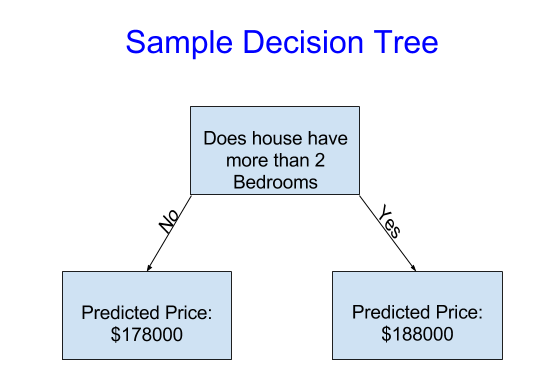

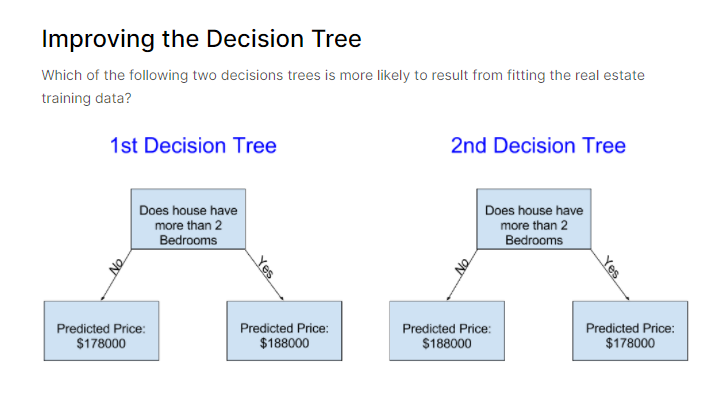

The decision tree on the left (Decision Tree 1) probably makes more sense, because it captures the reality that houses with more bedrooms tend to sell at higher prices than houses with fewer bedrooms. The biggest shortcoming of this model is that it doesn't capture most factors affecting home price, like number of bathrooms, lot size, location, etc.

We  can capture more factors using a tree that has more "splits." These are called "deeper" trees. A decision tree that also considers the total size of each house's lot might look like this:

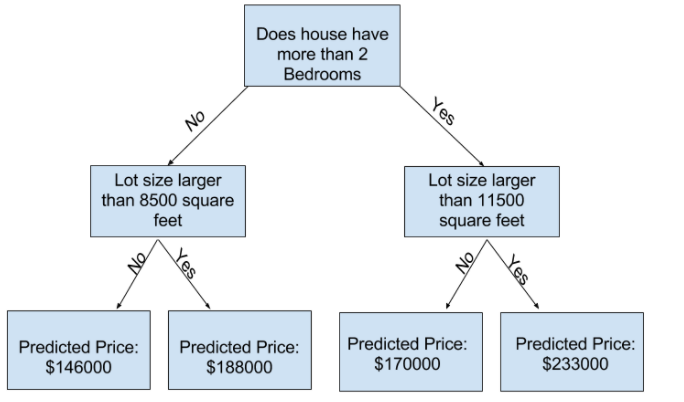

##  Basic Data Exploration

In [1]:
from google.colab import files
files.upload()

Saving archive (2).zip to archive (2).zip


{'archive (2).zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\x84$5O\xf9\xb4\xc4\xb9\xff\xff\xff\xff\xff\xff\xff\xff\r\x00\x14\x00melb_data.csv\x01\x00\x10\x00\xe7\xe8\x1f\x00\x00\x00\x00\x00\xcb\t\x07\x00\x00\x00\x00\x00\xc4\xbd\xdbv\x1c7\x93&z\xbf\x9f"\xafzn\xb8\xc5\xc4\x19y)\xc9\xb6\xd4\xedCs$\x8d\xb5\xfa2I\xa6\xc5\x1a\x15\xab4\xc5\xa2\xf4\xf3\x7f\xfa\x8dS\x00\xc8\xcc@\x16\xe0\xee\x9e\xed\xb5hR\x14%\x7f\x0e\xc4\xe1\x8b@D\xe0\xe3\xf3\xed\xf3\xe9\xf6\xea\xf5\xfd\xfdizz\xba\xfap<>>]}z\xf96]\xdd\x9cvw\xd3\xd5\xef\xd3\xf9\xe1x\x7f\xf5q\xda\xef\xa7\xd3\xbb\xab\x9f\xc6\xf3t\xf5\xd3\xee\xe9<\x1e\xcco\xde\x1c\x9f\xcew\xc7\xfb\xe9\xea\xcdt\x7f2\x7f\x92^\xbd\x19\xcf\x0f\xf6\xab\xab\xb7\xe3\xe9\xea\xb7\xf1p\xff\xb4\xfb\xa7\xf9\xed\xe7\xdd\xfe~w\xf8\xf2\xfa4\x8dW\xff1\x8d\'\xfb\x8d\xf3\xd5\xdb\xe3\xf3\xe1n\xb7w\xdf\xfdm<\x9fw\xe7g\xf3w\xfdv<|\t_~\x98\xbe\xec\x8e\x87\xc3\xf8h\xd1\x1c\xbfM\xa7\xf3\xcb\x9d\xf93\xe7\xff\xe7\xf5\xed\xed\xf1\xfc\xf4\xd7\xf1t\x7f\xa5E\xf7\xe9\xf9t\x98N\xdd\xc7\xf3\x15\xbdz\xb8

In [2]:
! unzip "/content/archive (2).zip"

Archive:  /content/archive (2).zip
  inflating: melb_data.csv           


In [3]:
import pandas as pd
# save filepath to variable for easier access
melbourne_file_path = '/content/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Interpreting Data Description

* The results show 8 numbers for each column in your original dataset. 

* The first number, the count, shows how many rows have non-missing values.

* Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

* The second value is the mean, which is the average. 
* Under that, std is the standard deviation, which measures how numerically spread out the values are.

* To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. 

* The first (smallest) value is the min. 
* If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. 
* That is the 25% value (pronounced "25th percentile"). 
* The 50th and 75th percentiles are defined analogously, and 
* the max is the largest number.

## Selecting Data for Modeling
To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame

In [4]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

## Selecting The Prediction Target

In [5]:
y = melbourne_data.Price

## Choosing "Features"

* For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

In [6]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [7]:
X = melbourne_data[melbourne_features]
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [8]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


## Building Your Model


You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

* Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
* Fit: Capture patterns from provided data. This is the heart of modeling.
* Predict: Just what it sounds like
* Evaluate: Determine how accurate the model's predictions are.


Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

* Specifying a number for random_state ensures you get the same results in each run. 
* This is considered a good practice. 
* You use any number, and model quality won't depend meaningfully on exactly what value you choose.

In [10]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Model Validation

## What is Model Validation
You'll want to evaluate almost every model you ever build. 

In most (though not all) applications, the relevant measure of model quality is predictive accuracy. 

In other words, will the model's predictions be close to what actually happens.

Many people make a huge mistake when measuring predictive accuracy. 

They make predictions with their training data and compare those predictions to the target values in the training data.

There are many metrics for summarizing model quality, but we'll start with one called **Mean Absolute Error (also called MAE)**. 

Let's break down this metric starting with the last word, error.

The prediction error for each house is:

**error=actual−predicted**

In [11]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

## The Problem with "In-Sample" Scores

* Since this pattern was derived from the training data, the model will appear accurate in the training data.

* But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

* Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. 

* The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called **validation data**.

* The scikit-learn library has a function train_test_split to break up the data into two pieces. 

* We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

In [12]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

271077.30664945126


* Your mean absolute error for the in-sample data was about 1116 dollars. Out-of-sample it is more than 271,000 dollars.